# Chapter 2 - Statistical learning

Selected exercises from ISLR - Chapter 2. Solutions are written in python.

First, let's import all the packages required to run the exercises below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

Links to the exercises in this notebook: <br>
[Exercise 9](#exercise-9) <br>
[Exercise 10](#exercise-10)

<a id='exercise-9'></a>
## Exercise 9

The exercise relates to the `Auto` dataset.

In [2]:
auto = pd.read_csv('data/Auto.csv')

First, let's drop the missing values. Analyzing the dataset we notice that no nan values are present in the dataset:

In [3]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

Ah! That's not true. Apparently the symbol for a missing value is the question mark '?'. Let's drop the `?` from the table:

In [4]:
print(f'The number of rows before filtering the ? is: {auto.shape[0]}')
auto.drop(auto[auto.values == '?'].index, inplace = True)
print(f'The number of rows after filtering the ? is: {auto.shape[0]}')

The number of rows before filtering the ? is: 397
The number of rows after filtering the ? is: 392


Further analysis shows that the variables `horsepower` is of type `object`. It is best to convert the feature to a quantitative type.

In [5]:
print(auto['horsepower'].dtypes)
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
print(auto['horsepower'].dtypes)

object
int64


### 9.a, 9.b, 9.c

In [6]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [7]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


The qualitative predictors are `origin` and `name`. <br>
Ranges, mean, standard deviation can be seen in the table above.

### 9.d

Remove the datapoints from the 10th through the 85th using the function `numpy.r_`. This method returns an array with the integers included in the given range.

In [8]:
range = np.r_[0:9, 86:auto.shape[0]]

In [9]:
auto_filtered = auto.iloc[range, :]
auto_filtered.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,24.437460,5.365079,186.869841,100.565079,2933.634921,15.740317,77.158730,1.603175
std,7.857825,1.650146,99.618599,35.657045,811.525400,2.687408,3.102323,0.820511
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,99.500000,75.000000,2212.500000,14.000000,75.000000,1.000000
50%,24.000000,4.000000,145.000000,90.000000,2790.000000,15.500000,77.000000,1.000000
75%,30.600000,6.000000,250.000000,115.000000,3484.500000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


### 9.e

Analyze graphically the full dataset:

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


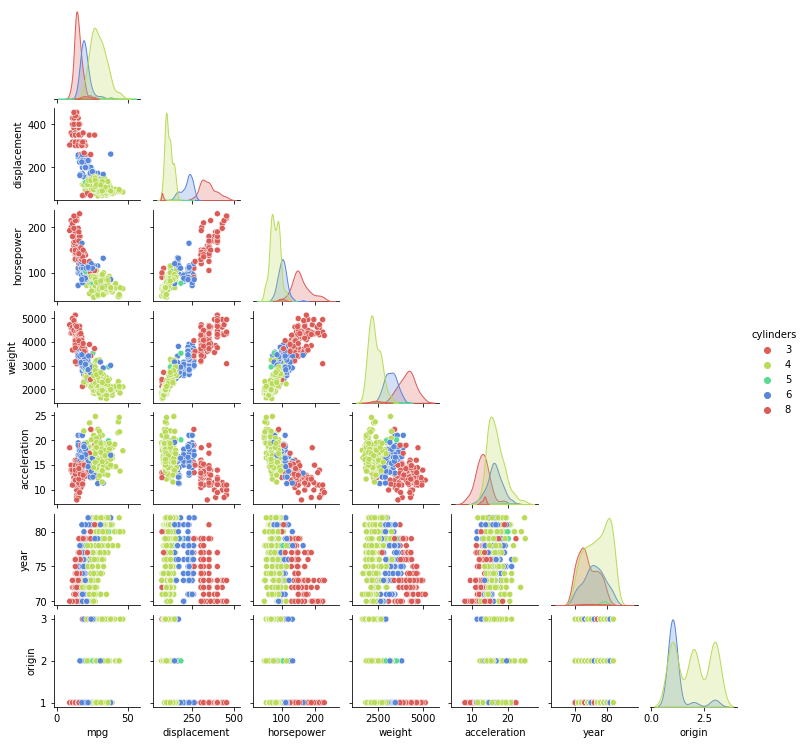

In [10]:
sns.pairplot(auto, height=1.5, hue='cylinders', palette='hls', corner=True)

Comments: <br>
- `displacement` and `mpg` are inversely correlated. The relation seems to be non-linear.
- `weight` and `mpg` are inversely correlated. The relation seems to be non-linear.
- `horsepower` and `mpg` are inversely correlated. The relation seems to be non-linear.
- `weight`, `displacement`, anhd `horsepower` are linearly correlated (as suggested by the three previous points).

### 9.f

`displacement`, `weight`, and `horsepower` might be the best features to predict `mpg`. However, they are strongly correlated, so a multiple linear regression using these predictors would not give reliable information regarding the importance of these two predictors.

<a id='exercise-10'></a>
## Exercise 10

This exercise involves the `Boston` data set.

In [11]:
boston = pd.read_excel('data/boston.xls')
boston_descr = load_boston()['DESCR']

In [12]:
print(boston_descr)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


### 10.a

In [14]:
print(f'There are {boston.shape[0]} rows and {boston.shape[1]} columns in the dataset')

There are 506 rows and 14 columns in the dataset


The dataset stores information for 506 neighbours in Boston (each row is a different neighbour).

### 10.b

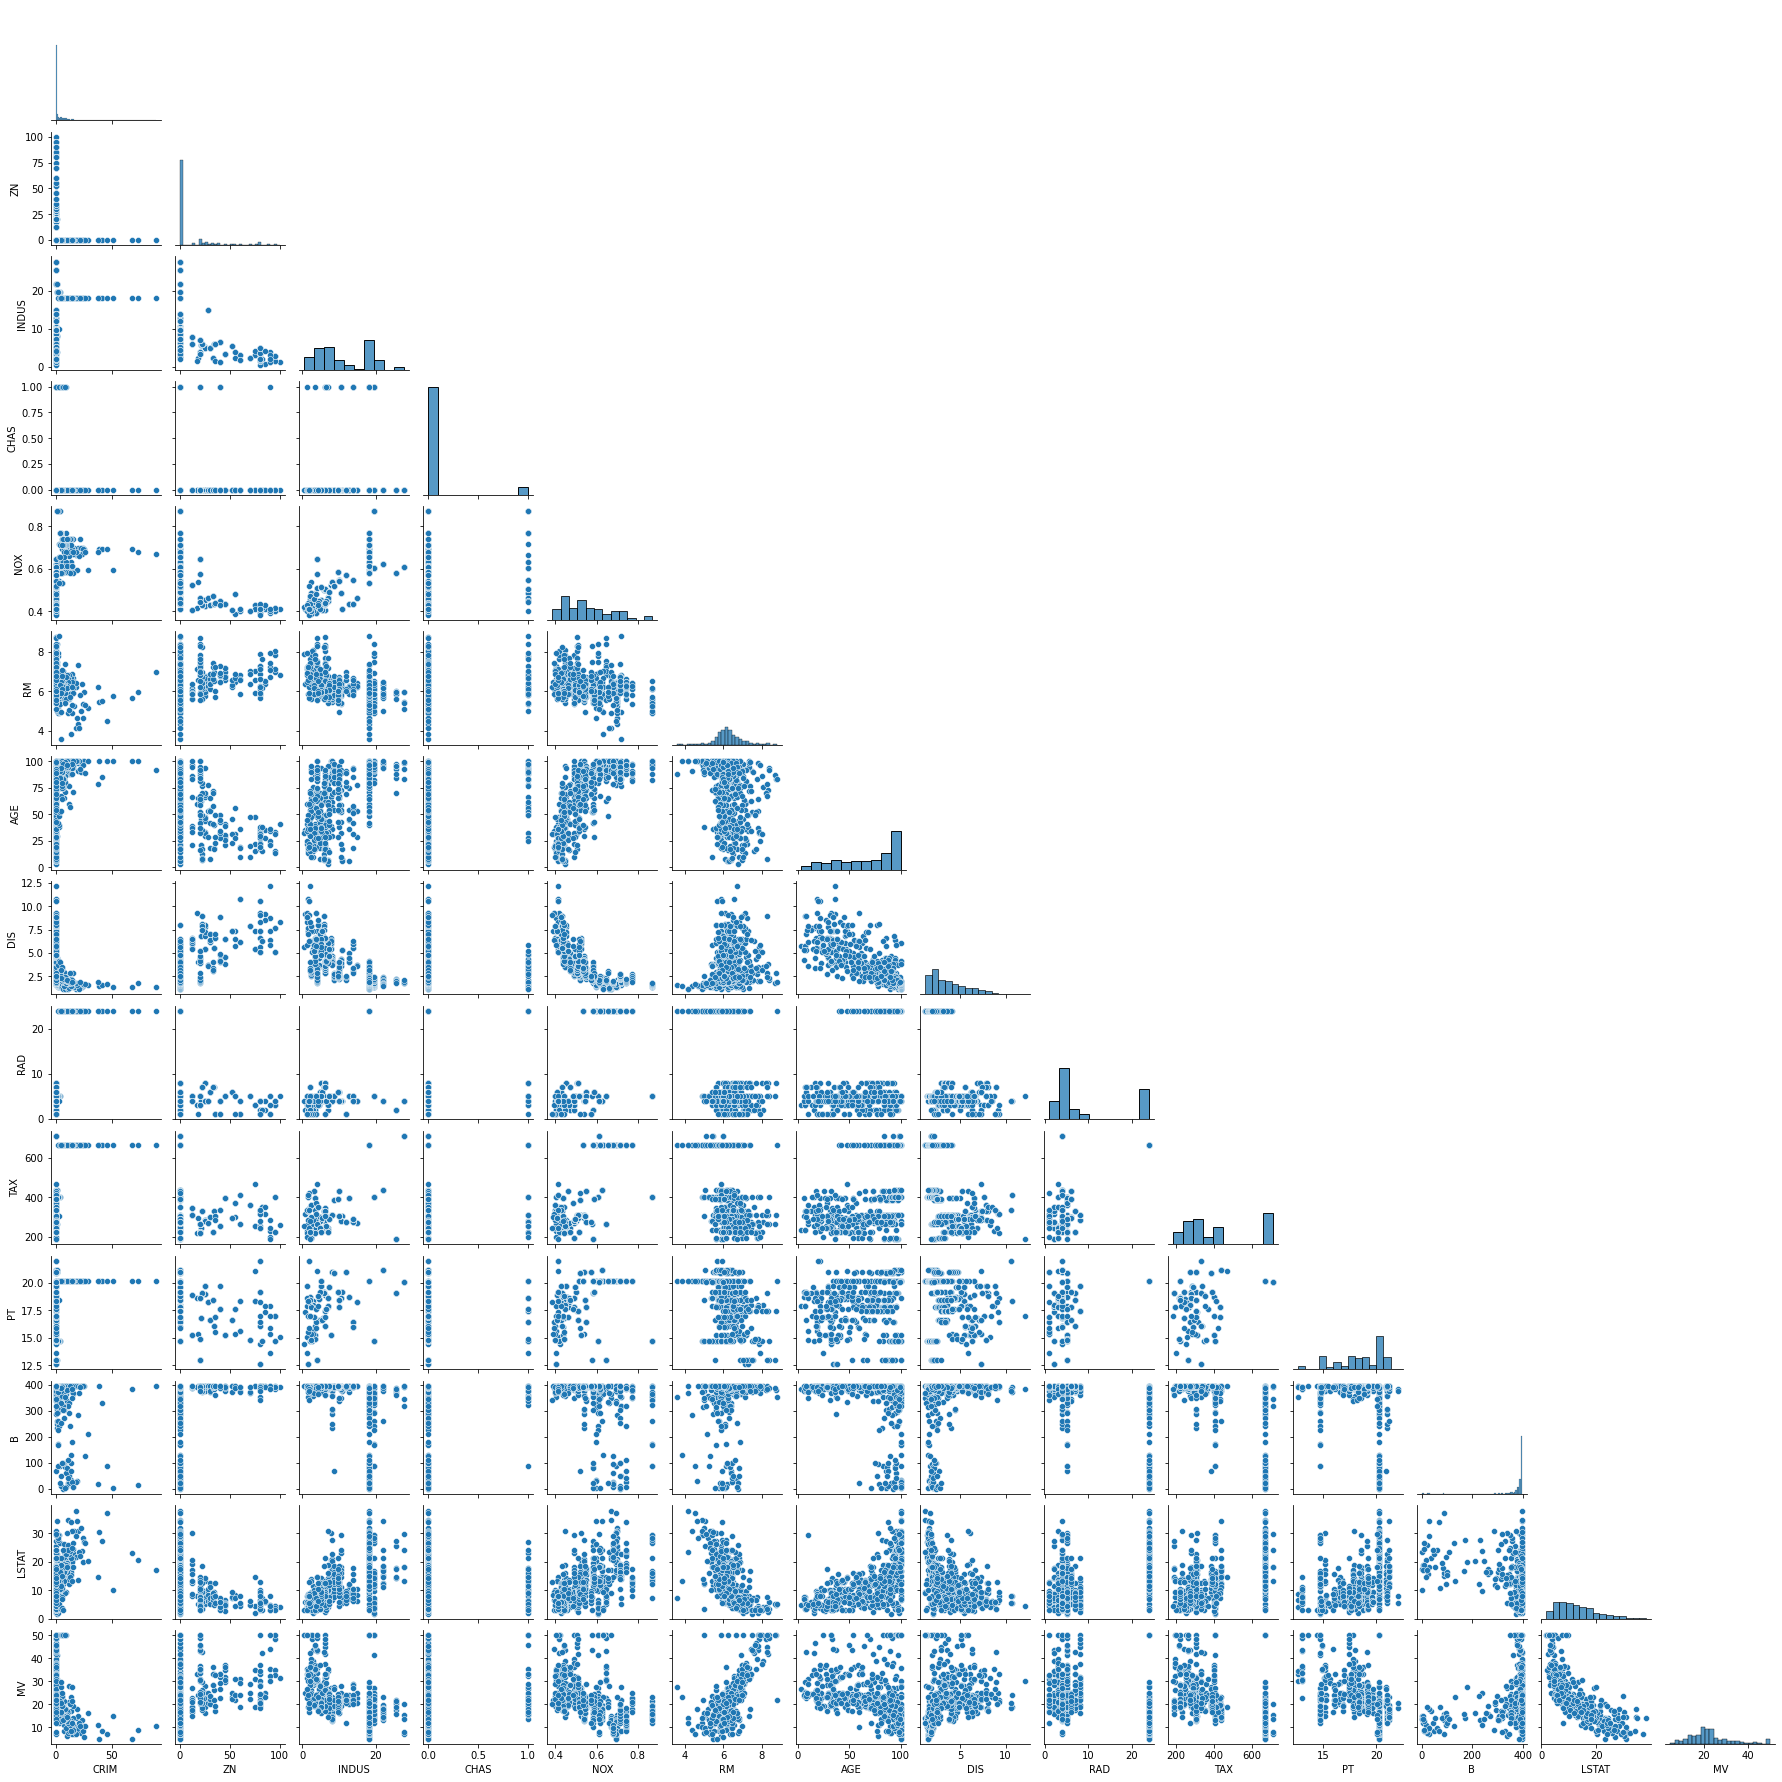

In [15]:
sns.pairplot(boston, height = 1.8, corner = True)

### 10.c 

 The only predictors that seem (weakly) associated to `CRIM` (per capita crime rate) are `AGE` (proportion of owner-occupied units built prior to 1940) and `DIS` (weighted distances to five Boston employment centres).

### 10.d

To analyze the three predictors required, `'CRIM', 'TAX', 'PT'`, we can plot the scatterplot and the histogram of these variables.

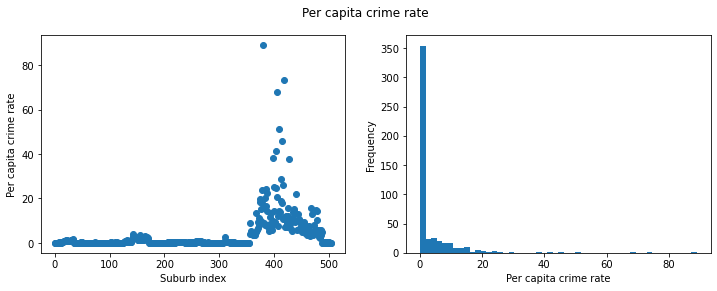

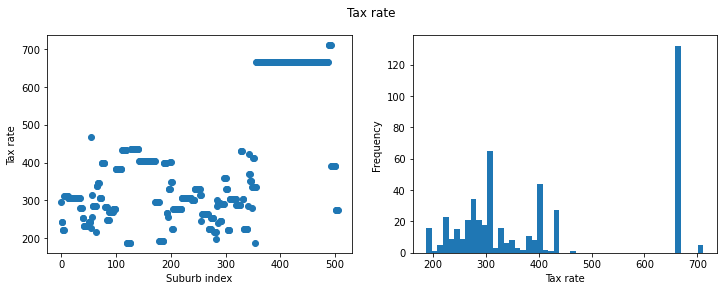

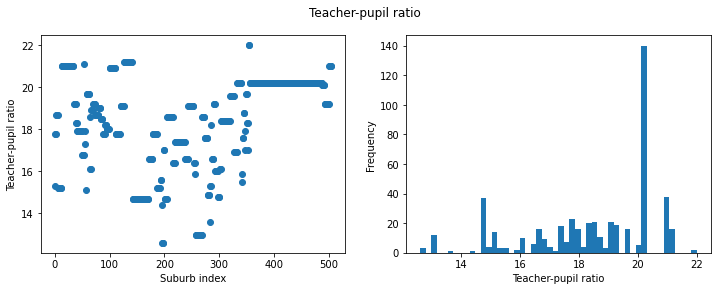

In [24]:
title_list = ['Per capita crime rate', 'Tax rate', 'Teacher-pupil ratio']
col_list = ['CRIM', 'TAX', 'PT']
for i in [0, 1, 2]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))   # 1 row, 2 columns
    fig.suptitle(title_list[i])
    ax1.scatter(x = np.arange(0, boston.shape[0]), y = boston[col_list[i]].values)
    ax1.set(xlabel='Suburb index', ylabel=title_list[i])
    ax2.hist(boston[col_list[i]].values, bins=50)
    ax2.set(xlabel=title_list[i], ylabel='Frequency')
    plt.show()

The vast majority of suburbs have a low per capita crime rate:

In [25]:
boston['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976196
Name: CRIM, dtype: float64

The average crime rate per capita is 3, while the maximum is 88.98. The distribution is extremely skewed. \
A similar analysis can be performed for other variables shown above (tax rates, pupil-teacher ratios).

### 10.e

Since the variable `CHAS` can only assume the values 0 and 1, the number of suburbs that bound the Charles river can be computed as:

In [26]:
boston['CHAS'].sum()

35

### 10.f

The median pupil-teacher ratio is:

In [30]:
pt_median =np.median(boston['PT'].values)
pt_mean = np.mean(boston['PT'].values)
print(f'The median pupil-teacher ratio is {pt_median}')
print(f'The average pupil-teacher ratio is {pt_mean}')

The median pupil-teacher ratio is 19.05000019
The average pupil-teacher ratio is 18.4555338277668


This mean and median are different, since the distribution is skewed to the left.

### 10.g

The suburbs with the lowest median value of owner-occupied homes (`MEDV`) are:

In [38]:
boston[boston['MV'] == boston['MV'].min()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
398,38.351799,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.200001,396.899994,30.59,5.0
405,67.920799,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.200001,384.970001,22.98,5.0


To compare the lowest median value with the other suburbs, we can plot the boxplots for all the features and highlight where the suburb with the lowest median value lie (represented by the red dots below):

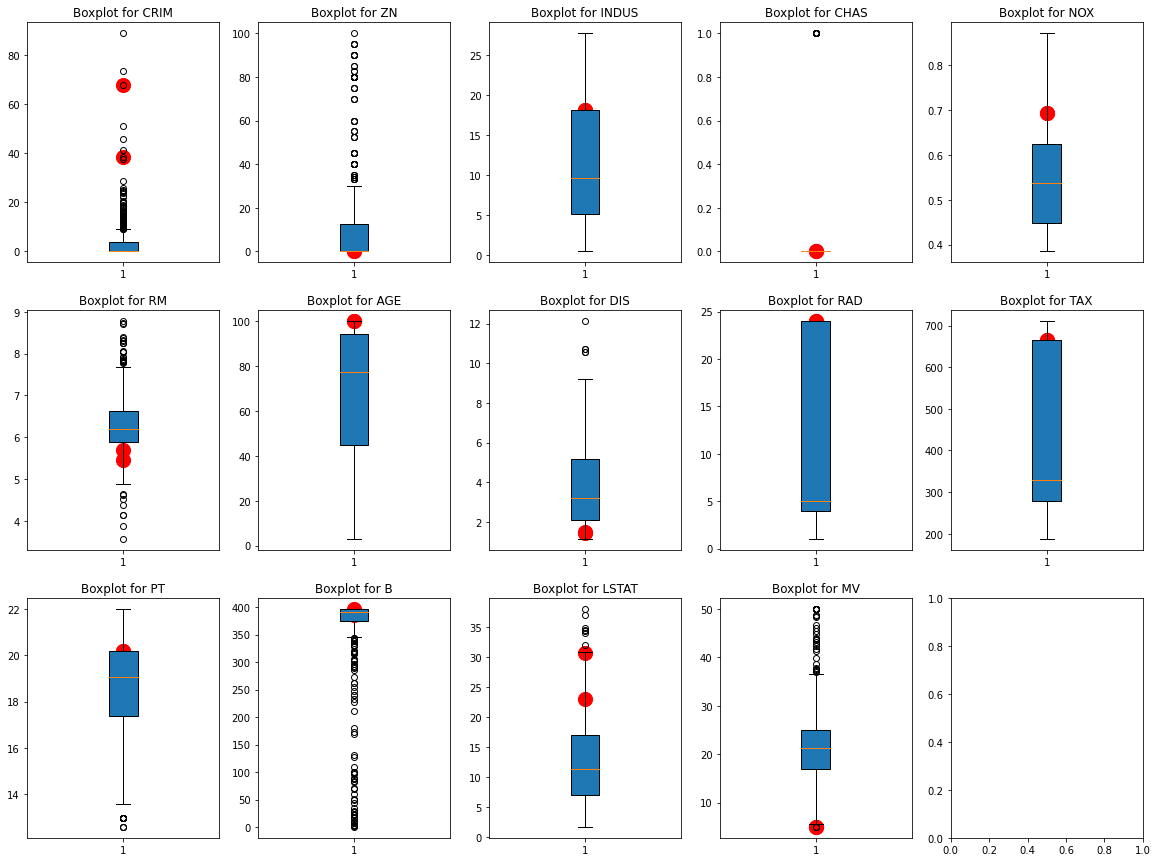

In [138]:
list_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT', 'MV']
fig, axs = plt.subplots(3, 5, figsize=(20, 15))
axs = np.ravel(axs)
for i in np.arange(0, 14):
    axs[i].boxplot(boston[list_cols[i]].values, patch_artist=True)
    axs[i].title.set_text(f'Boxplot for {list_cols[i]}')
    axs[i].scatter([1, 1], [boston.loc[398, list_cols[i]], boston.loc[405, list_cols[i]]], 
           marker='o', s=200, color='r')
plt.show()

The values related to the lowest median value (neighbour 398 and neighbour 405) are extreme for almost all predictors. \
In these neighbours:
- The crime rate per capita is significantly higher than the median (3) in these neighbours. \
- All the houses in those were built before 1940 (as reported by the variable `AGE`). \
- The lower status of the population (`LSTAT`) is 30.59% and 22.98%. To see how this compares to the other suburbs, let's plot the histogram and the scatterplot:

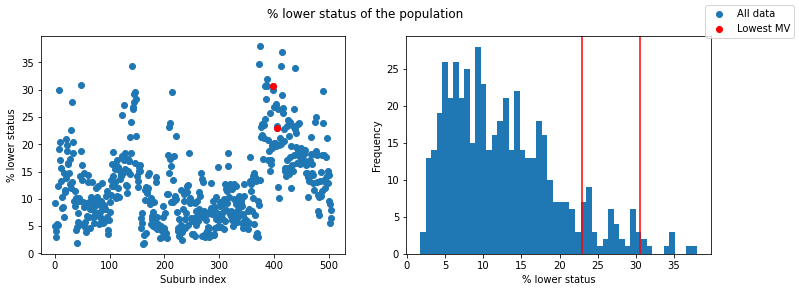

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))   # 1 row, 2 columns
fig.suptitle('% lower status of the population')
ax1.scatter(x = np.arange(0, boston.shape[0]), y = boston['LSTAT'].values)
ax1.scatter(x = [398, 405], y = [boston.loc[398, 'LSTAT'], boston.loc[405, 'LSTAT']], c='red')
ax1.set(xlabel = 'Suburb index', ylabel = '% lower status')
ax2.hist(boston['LSTAT'].values, bins = 50)
ax2.axvline(x = boston.loc[398, 'LSTAT'], c='red')
ax2.axvline(x = boston.loc[405, 'LSTAT'], c='red')
ax2.set(xlabel = '% lower status', ylabel = 'Frequency')
fig.legend(['All data', 'Lowest MV'], loc='upper right')
plt.show()

The lower status is definitely higher than in the majority of the suburbs. The same information could be obtained using a boxplot.

### 10.h

To count how many suburbs average more than 7 rooms per dwelling, we analyze the feature `RM`:

In [119]:
boston[boston['RM'] > 7].shape[0]

64

The number of suburbs that average more than 8 rooms per dwelling is:

In [123]:
boston_8rooms = boston[boston['RM'] > 8]
boston_8rooms.shape[0]

13

It's interesting to visualize the median value `MV` for these 13 suburbs, as well as the Pupil-teacher ratio:

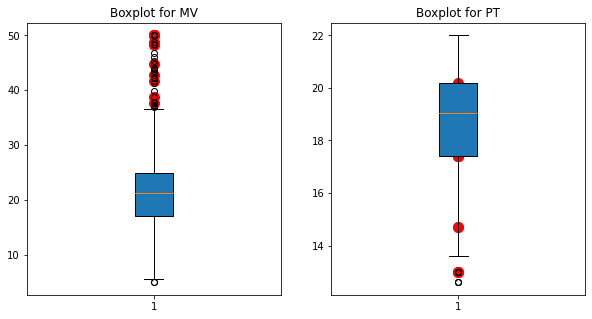

In [145]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(boston['MV'].values, patch_artist=True)
axs[0].title.set_text(f'Boxplot for MV')
axs[0].scatter(np.ones(boston_8rooms['MV'].shape[0]), boston_8rooms['MV'].values, marker='o', s=100, color='r')
axs[1].boxplot(boston['PT'].values, patch_artist=True)
axs[1].title.set_text(f'Boxplot for PT')
axs[1].scatter(np.ones(boston_8rooms['PT'].shape[0]), boston_8rooms['PT'].values, marker='o', s=100, color='r')
plt.show()

As expected, the majority of median value `MV` and `PT` values are outliers.